# PCA

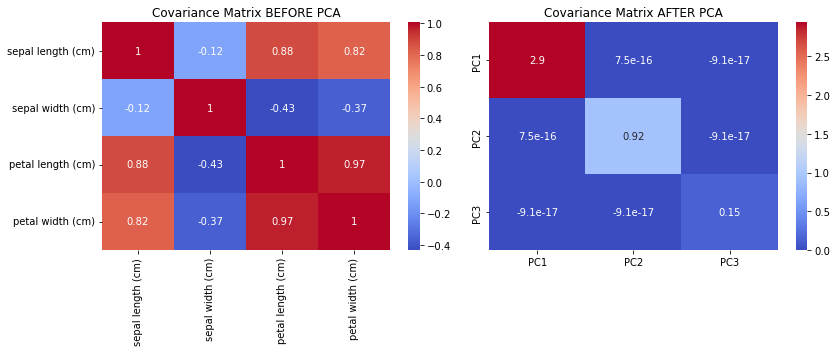

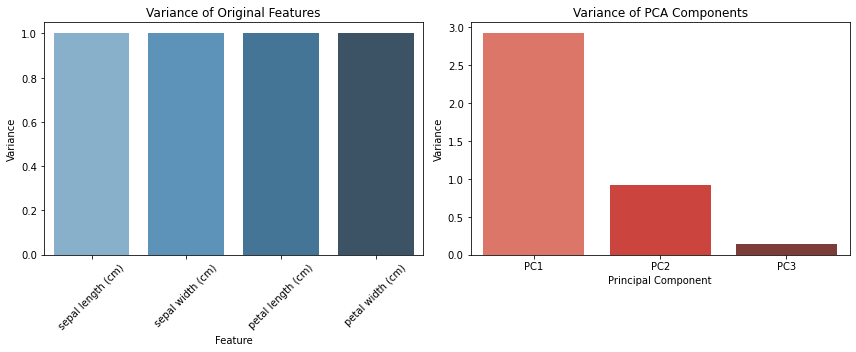



Total variance before PCA: 3.9999999999999987
Total variance after PCA: 3.979285163571385


In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Iris dataset
iris = load_iris()
X = iris.data
df = pd.DataFrame(X, columns=iris.feature_names)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Covariance matrix BEFORE PCA
cov_before = np.cov(X_scaled.T)

# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Covariance matrix AFTER PCA
cov_after = np.cov(X_pca.T)

# Plot heatmaps
plt.figure(figsize=(12, 5))

# Heatmap BEFORE PCA
plt.subplot(1, 2, 1)
sns.heatmap(cov_before, annot=True, xticklabels=iris.feature_names, yticklabels=iris.feature_names, cmap='coolwarm')
plt.title('Covariance Matrix BEFORE PCA')

# Heatmap AFTER PCA
plt.subplot(1, 2, 2)
sns.heatmap(cov_after, annot=True, cmap='coolwarm', 
            xticklabels=[f'PC{i+1}' for i in range(3)], 
            yticklabels=[f'PC{i+1}' for i in range(3)])
plt.title('Covariance Matrix AFTER PCA')

plt.tight_layout()
plt.show()


# --- Bar Charts for Variance ---

# Variance of each original feature
original_variance = np.var(X_scaled, axis=0)
# Variance of each PCA component
pca_variance = np.var(X_pca, axis=0)

# Plot barcharts
plt.figure(figsize=(12, 5))

# Bar chart BEFORE PCA
plt.subplot(1, 2, 1)
sns.barplot(x='Feature', y='Variance', data=df_original_var, palette='Blues_d')
plt.title("Variance of Original Features")
plt.xticks(rotation=45)

# Bar chart AFTER PCA
plt.subplot(1, 2, 2)
sns.barplot(x='Principal Component', y='Variance', data=df_pca_var, palette='Reds_d')
plt.title("Variance of PCA Components")

plt.tight_layout()
plt.show()

# Print total variance
print("\n\nTotal variance before PCA:", np.sum(np.var(X_scaled, axis=0)))
print("Total variance after PCA:", np.sum(np.var(X_pca, axis=0)))